In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import sys, os
sys.path.append(os.path.abspath('SBTS/metrics/'))

In [14]:
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger('matplotlib.mathtext').setLevel(logging.WARNING)

sys.path.append(os.path.abspath("metrics"))

from models.sbts_uni_markovian import *
from metrics.eval_functions import *
from metrics.get_params import *
from utils.data_generation import *

In [52]:
M = 500
Generate_OU = Generate_Data(M)

theta_range = [0.5, 2.5]
mu_range = [0.5, 1.5]
sigma_range = [0.1, 0.5]
N = 252
deltati = 1/252
x0=1

X_ou = Generate_OU.generate_OU(theta_range, mu_range, sigma_range, N, deltati, x0)
X_ou_return = np.zeros((M, N+1))
X_ou_return[:,1:] = np.diff(np.log(X_ou), axis=1)

X_ou_return_sbts = simusbts_mark(N, M, K=1, X=X_ou_return, N_pi=100, h=0.4, deltati=deltati, M_simu=500)
X_ou_sbts = np.exp(X_ou_return_sbts.cumsum(axis=1))
X_ou = X_ou[:, 1:]

Start time: 07:00:45
Expected finish time: 07:03:04
Finish time: 07:02:33
Time with numba to generate 500 samples with N_pi=100: 108 seconds.


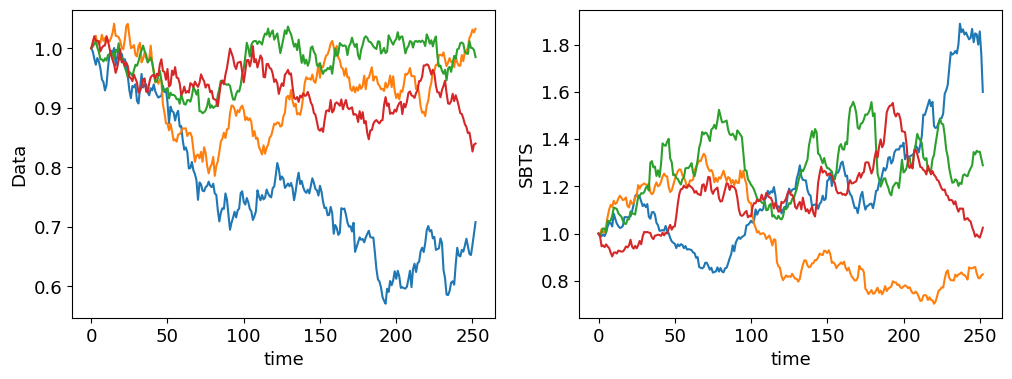

In [53]:
plot_sample(X_ou, X_ou_sbts, 1)

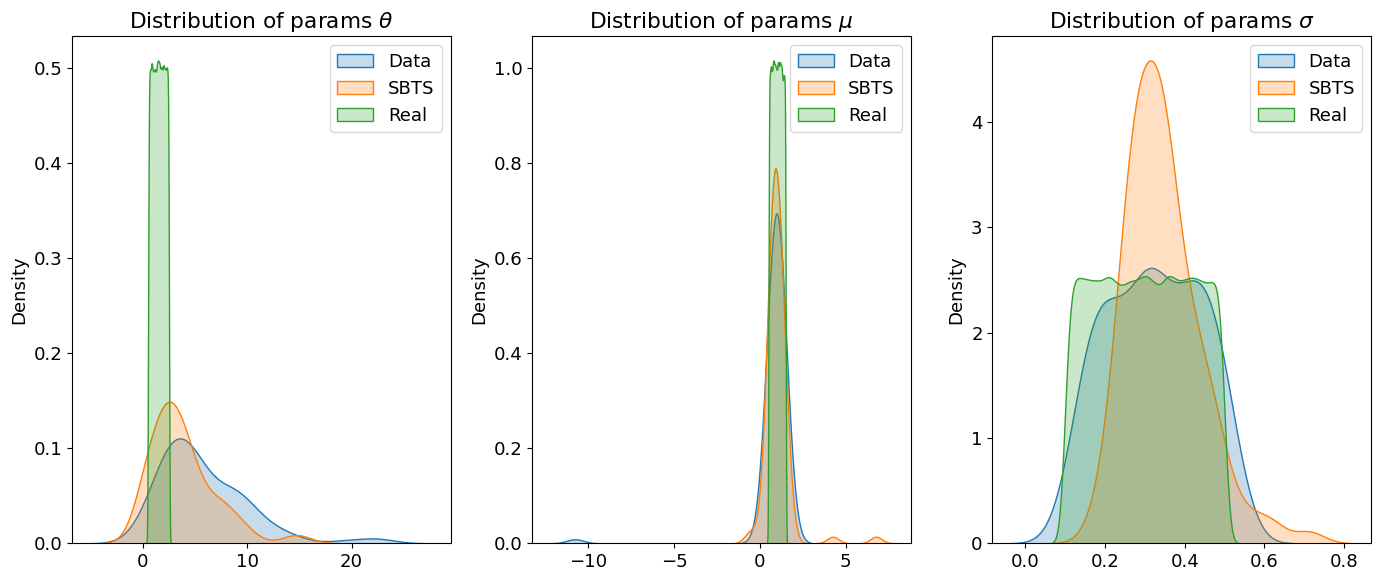

In [42]:
plot_params_distrib_OU(X_ou, X_ou_sbts, dt=deltati)